Stock Market Prediction Using ML (LinearRegression)

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

# for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [40]:
maruti = pd.read_csv(r'..\Data\MARUTI.NS.csv')
maruti.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,09/07/2003,164.899994,170.399994,155.00,164.300003,144.897522,35164284
1,10/07/2003,167.000000,168.699997,164.50,167.000000,147.278656,10464179
2,11/07/2003,167.750000,174.850006,166.25,173.350006,152.878784,11740117
3,14/07/2003,174.250000,179.250000,174.25,177.949997,156.935547,5982324
4,15/07/2003,200.000000,200.000000,173.00,176.199997,155.392227,6173689


In [41]:
maruti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4490 entries, 0 to 4489
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4490 non-null   object 
 1   Open       4490 non-null   float64
 2   High       4490 non-null   float64
 3   Low        4490 non-null   float64
 4   Close      4490 non-null   float64
 5   Adj Close  4490 non-null   float64
 6   Volume     4490 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 245.7+ KB


In [42]:
maruti['Date'] = pd.to_datetime(maruti['Date'])

C:\Users\pradi\AppData\Local\Temp\ipykernel_24752\3101600172.py:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [43]:
print(f"Dataframe contains stock prices between {maruti.Date.min()} {maruti.Date.max()}.")
print(f"Total days = {(maruti.Date.max() - maruti.Date.min()).days} days.")

Dataframe contains stock prices between 2003-01-08 00:00:00 2021-12-08 00:00:00.
Total days = 6909 days.


In [44]:
maruti.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4.490000e+03
mean,3000.274880,3035.804401,2961.091667,2997.371113,2854.661559,1.184771e+06
std,2779.395644,2803.931484,2749.327209,2774.645926,2708.678669,1.628871e+06
min,164.000000,168.699997,155.000000,164.300003,144.897522,0.000000e+00
25%,828.849991,842.812500,810.000000,826.325012,738.526291,4.257702e+05
50%,1425.000000,1446.000000,1402.150024,1423.000000,1302.648316,6.870695e+05
75%,5525.949951,5618.674926,5451.500000,5513.987549,5303.088379,1.199356e+06
max,9966.000000,9996.400391,9725.000000,9832.450195,9382.802734,3.516428e+07


<AxesSubplot: >

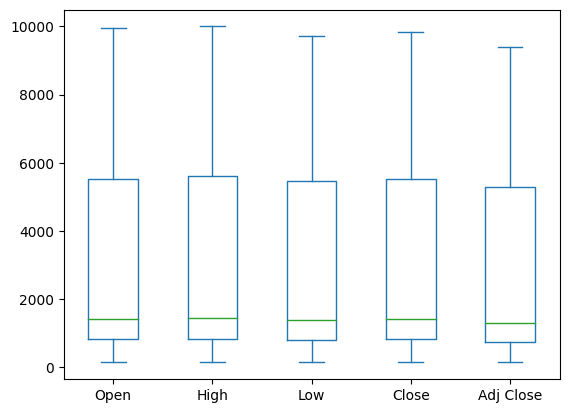

In [45]:
maruti[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [46]:
#setting the layout for our plot
layout = go.Layout(
    title= "Stock Price of Tesla",
    xaxis=dict(
        title ='Date',
        titlefont = dict(
            family="Courier New, monospace",
            size=18,
            color='#7f7f7f',
        )
    ),
    yaxis=dict(
        title = 'Price',
        titlefont = dict(
            family = "Courier New, monospace",
            size = 18,
            color= '#7f7f7f'
        )
    )
)

maruti_date = [{'x':maruti['Date'], 'y':maruti['Close']}]
plot = go.Figure(data =maruti_date, layout=layout)

In [47]:
iplot(plot)

In [48]:
#bulding the regresstion model
from sklearn.model_selection import train_test_split

#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evolution
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import r2_score


In [49]:
X = np.array(maruti.index).reshape(-1,1)
Y = maruti['Close']
X_train,x_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=101) 

In [50]:
#Feature scaling
scaler = StandardScaler().fit(X_train)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
#Creating a Linear model
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [53]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
maruti_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data = maruti_data,layout=layout)

In [54]:
iplot(plot2)

In [55]:
#Calculate score for model evalution
score = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train,lm.predict(X_train))}\t{r2_score(Y_test,lm.predict(x_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test,lm.predict(x_test))}
'''

print(score)


Metric           Train                Test        
r2_score  0.7776053216323461	0.783696236675233
MSE       1697451.1348234375	1697335.5855796451

